In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as nm
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt


In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/panda_dataset/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/panda_dataset/Fake.csv")

In [ ]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.shape,data_fake.shape

((21417, 4), (23481, 4))

In [ ]:
data_true['class']=1
data_fake['class']=0

In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
  data_true.drop([i],axis=0,inplace=True)

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
  data_fake.drop([i],axis=0,inplace=True)

In [ ]:
data_manual_testing = pd.concat([data_true_manual_testing,data_fake_manual_testing],axis=0)
data_manual_testing.to_csv("manual_testing.csv")

In [ ]:
data_merge = pd.concat([data_true,data_fake],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


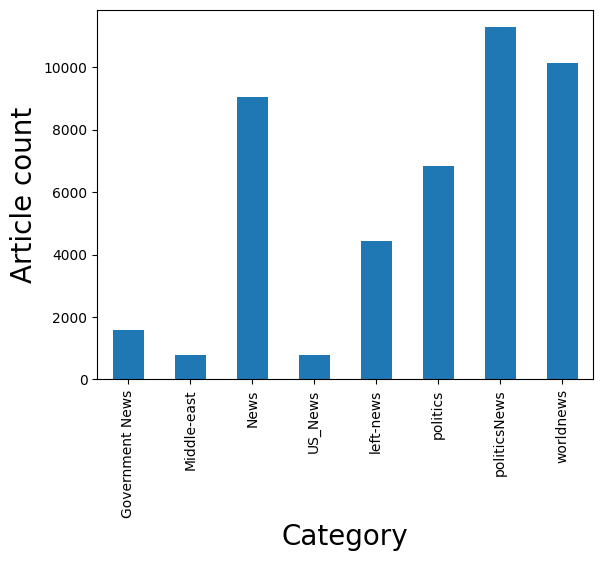

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind='bar')
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0= Fake news
1= True news


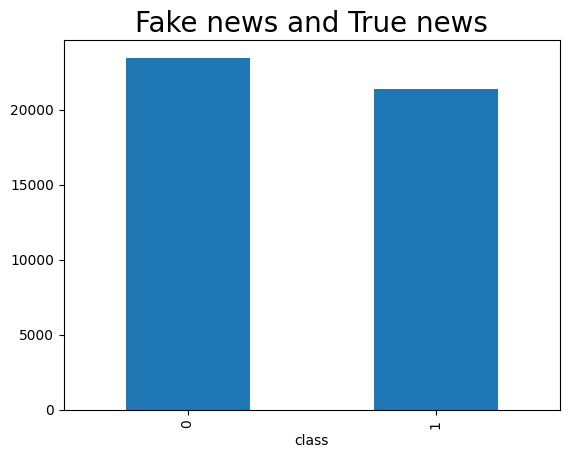

In [ ]:
print(data_merge.groupby(['class'])['text'].count())
print("0= Fake news")
print("1= True news")
data_merge.groupby(['class'])['text'].count().plot(kind='bar')
plt.title("Fake news and True news",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


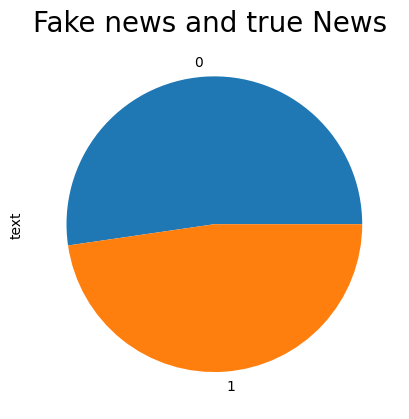

In [ ]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title('Fake news and true News ',size=20)
plt.show()

In [ ]:
data=data_merge.drop(['title','subject','date'],axis=1)
data.head(10)

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",1
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",1
7,The following statements were posted to the ve...,1
8,The following statements were posted to the ve...,1
9,WASHINGTON (Reuters) - Alabama Secretary of St...,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data= data.sample(frac=1)
data.head(10)

,text,class
12245,SANTIAGO (Reuters) - Chile s presidential hope...,1
7544,"As Addicting Info reported here, Donald Trump ...",0
14666,This is possibly the most disturbing video we ...,0
20522,"Meanwhile, Obama has brilliantly distracted Am...",0
19630,WASHINGTON (Reuters) - U.S. Senator Bill Nelso...,1
10325,WASHINGTON (Reuters) - U.S. Senate Republican ...,1
2878,This should come as a surprise to no one ever ...,0
16687,(Reuters) - The trial of a Mexican man accused...,1
13766,ANKARA (Reuters) - Turkish and Sudanese intell...,1
17672,SOFIA (Reuters) - Couples lining up to face ea...,1


In [ ]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
def filtering(data):
  text=data.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

In [ ]:
data['text']=data['text'].apply(filtering)
data.head(10)

,text,class
12245,santiago reuters chile s presidential hope...,1
7544,as addicting info reported here donald trump ...,0
14666,this is possibly the most disturbing video we ...,0
20522,meanwhile obama has brilliantly distracted am...,0
19630,washington reuters u s senator bill nelso...,1
10325,washington reuters u s senate republican ...,1
2878,this should come as a surprise to no one ever ...,0
16687,reuters the trial of a mexican man accused...,1
13766,ankara reuters turkish and sudanese intell...,1
17672,sofia reuters couples lining up to face ea...,1


In [ ]:
x=data['text']
y=data['class']

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

LR.score(xv_test, y_test)

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5839
           1       0.99      0.99      0.99      5381

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
def predict_news(text):
  text_vectorized = vectorization.transform([filtering(text)])
  prediction = LR.predict(text_vectorized)
  if prediction == 1:
    return "LR-This news is likely true."
  else:
    return "'LR-This news is likely fake."
  prediction = DT.predict(text_vectorized)
  if prediction == 1:
    return "DT-This news is likely true."
  else:
    return "DT-This news is likely fake."

user_input = input("Enter news text: ")
result = predict_news(user_input)
print(result)

Enter news text: The head of a conservative Republican faction in the U.S.
LR-This news is likely true.


In [ ]:
def predict_news(text):
  text_vectorized = vectorization.transform([filtering(text)])
  prediction = DT.predict(text_vectorized)
  if prediction == 1:
    return "DT-This news is likely true."
  else:
    return "DT-This news is likely fake."

user_input = input("Enter news text: ")
result = predict_news(user_input)
print(result)

Enter news text: The head of a conservative Republican faction in the U.S
DT-This news is likely fake.
